In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# Prewitt GX and GY

def Compute_GX_GY(IMAGE):
    Image_n,Image_m=IMAGE.shape
    start_n=1
    start_m=1
    end_n=Image_n-1#it should be -2 but range would not take last value of it so will give it one more
    end_m=Image_m-1##it should be -2 but range would not take last value of it so will give it one more
    
    Prewitt_gx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    Gx_n,Gx_m=Prewitt_gx.shape
    GX=np.zeros((Image_n,Image_m),dtype=np.float)
    
    Prewitt_gy=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    Gy_n,Gy_m=Prewitt_gy.shape
    GY=np.zeros((Image_n,Image_m),dtype=np.float)

    for II in range(start_n,end_n):
        for JJ in range(start_m,end_m):
            SetX=0
            SetY=0
            
            I_Temp=II-1
            J_Temp=JJ-1
            for I1 in range(Gx_n):
                J_Temp=JJ-1
                for J1 in range(Gx_m):
                   # print(II,JJ,I1,J1,I_Temp,J_Temp)
                    SetX+=(Prewitt_gx[I1][J1])*(IMAGE[I_Temp][J_Temp])
                    SetY+=(Prewitt_gy[I1][J1])*(IMAGE[I_Temp][J_Temp])
                    
                    J_Temp+=1
                I_Temp+=1
            GX[II][JJ]=SetX
            GY[II][JJ]=SetY
    GX_NORMALIZED=np.abs(GX)/3
    GY_NORMALIZED=np.abs(GY)/3
    
   # print('----------------GX_No-------')
    #print(np.isnan(GX_NORMALIZED).any())
    #print(np.isnan(GY_NORMALIZED).any())
    
    return GX,GY,GX_NORMALIZED,GY_NORMALIZED

In [3]:
# Function for computing Prewitt's MAGNITUTE
def COMPUTE_MAGNITUDE(IMAGE,GX_NORMALIZED,GY_NORMALIZED,o):
    IMAGE_N,IMAGE_M=IMAGE.shape
    MAGNITUDE=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float) 
    NORMALIZED_MAGNITUDE=np.zeros((IMAGE_N,IMAGE_M),dtype=np.int)
    for i in range(IMAGE_N):
        for j in range(IMAGE_M):
            MAGNITUDE[i][j]=np.hypot(GX_NORMALIZED[i][j],GY_NORMALIZED[i][j]) # To calculate magintude
    
    NORMALIZED_MAGNITUDE=(np.round(MAGNITUDE/(np.sqrt(2)))) # Hold normalized magnitue after applying prewitt operation  
    
    #print("--------Normalized Magnitude Image after Prewitt operation--------")
    plt.imshow(NORMALIZED_MAGNITUDE)
    plt.show()
    
    cv2.imwrite('NORMALIZED_MAGNITUDE_Image_%d.bmp'%(o),NORMALIZED_MAGNITUDE)
    
    return NORMALIZED_MAGNITUDE

In [4]:
# Function for computing Gradient Angle
def COMPUTE_ANGLE(IMAGE,GX,GY):
    IMAGE_N,IMAGE_M=IMAGE.shape
    
    ANGLE=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
    ANGLE=np.arctan2(GY,GX)* 180 / np.pi # arctan2 returns in radians so to convert it into degree we did this
    ANGLE=ANGLE+360
    ANGLE=np.fmod(ANGLE,360)# To deal with negative values of angle
    
    return ANGLE

In [5]:
#make angle between 0-180
def Compute_scaled_angle(Angle):
    IMAGE_N,IMAGE_M=Angle.shape
    Scaled_angle=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
    for i in range(0,IMAGE_N):
        for j in range(0,IMAGE_M):
            if(Angle[i][j]>=170 and Angle[i][j]<350):
                Scaled_angle[i][j]=Angle[i][j]-180
            elif(Angle[i][j]>=350 and Angle[i][j]<360):
                Scaled_angle[i][j]=Angle[i][j]-360
            else:
                Scaled_angle[i][j]=Angle[i][j]
    
    return Scaled_angle

In [6]:
# 8*8 Cell  and 16 * 16 pixel block! we move a cell for new block
def Compute_Histogram1(NORMALIZED_MAGNITUDE,Scaled_Angle):
    I_n,I_m=NORMALIZED_MAGNITUDE.shape
    start_n=0
    start_m=0
    Block_move_size=8
    i=0
    j=0
    Descriptor=[]
    while(i+16<=I_n):
        j=0
        while(j+16<=I_m):
            Block=[]
            Num_cell=0
            Cell_i=i
            Cell_j=j
            for Num_cell in range(4):
                Histogram_for_cell=np.zeros((9,1),dtype=np.float)
                
                for i1 in range(Cell_i,Cell_i+8):
                    for j1 in range(Cell_j,Cell_j+8):
                        #print(i,j,i1,j1,Cell_i,Cell_j)
                        if(Scaled_Angle[i1][j1]==0):
                            #do
                            Histogram_for_cell[0][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==20):
                            #do
                            Histogram_for_cell[1][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==40):
                            #do
                            Histogram_for_cell[2][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==60):
                            #do
                            Histogram_for_cell[3][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==80):
                            #do
                            Histogram_for_cell[4][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==100):
                            #do
                            Histogram_for_cell[5][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==120):
                            #do
                            Histogram_for_cell[6][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==140):
                            #do
                            Histogram_for_cell[7][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        elif(Scaled_Angle[i1][j1]==160):
                            #do
                            Histogram_for_cell[8][0]+=NORMALIZED_MAGNITUDE[i1][j1]
                        else:
                            c1=-111
                            c2=-111
                            if(Scaled_Angle[i1][j1]>=-10 and Scaled_Angle[i1][j1]<0):
                                dis=0-Scaled_Angle[i1][j]
                                Factor_c1=(20-(np.abs(0+Scaled_Angle[i1][j1])))/20
                                Factor_c2=(20-(np.abs(20+Scaled_Angle[i1][j1])))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            if(Scaled_Angle[i1][j1]>0 and Scaled_Angle[i1][j1]<20):
                                # do for center 0 and 20
                                c1=0
                                c2=1
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-0)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-20)))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[1][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>20 and Scaled_Angle[i1][j1]<40):
                                #do for center 20 and 40
                                c1=1
                                c2=2
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-20)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-40)))/20
                                
                                Histogram_for_cell[1][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[2][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                                
                            elif(Scaled_Angle[i1][j1]>40 and Scaled_Angle[i1][j1]<60):
                                #do for center 40 and 60
                                c1=2
                                c2=3
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-40)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-60)))/20
                                
                                Histogram_for_cell[2][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[3][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>60 and Scaled_Angle[i1][j1]<80):
                                #do for center 60 and 80
                                c1=3
                                c2=4
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-60)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-80)))/20
                                
                                Histogram_for_cell[3][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[4][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>80 and Scaled_Angle[i1][j1]<100):
                                #do for center 80 and 100
                                c1=4
                                c2=5
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-80)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-100)))/20
                                
                                Histogram_for_cell[4][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[5][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>100 and Scaled_Angle[i1][j1]<120):
                                #do for center 100 and 120
                                c1=5
                                c2=6
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-100)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-120)))/20
                                
                                Histogram_for_cell[5][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[6][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>120 and Scaled_Angle[i1][j1]<140):
                                #do for center 120 and 140
                                c1=6
                                c2=7
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-120)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-140)))/20
                                
                                Histogram_for_cell[6][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[7][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>140 and Scaled_Angle[i1][j1]<160):
                                #do for center 140 and 160
                                c1=7
                                c2=8
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-140)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-160)))/20
                                
                                Histogram_for_cell[7][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                            elif(Scaled_Angle[i1][j1]>160 and Scaled_Angle[i1][j1]<170 ):
                                #do for center 160 and 0
                                c1=0
                                c2=8
                                Factor_c1=(20-(np.abs(Scaled_Angle[i1][j1]-180)))/20
                                Factor_c2=(20-(np.abs(Scaled_Angle[i1][j1]-160)))/20
                                
                                Histogram_for_cell[0][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c1)
                                Histogram_for_cell[8][0]+=(NORMALIZED_MAGNITUDE[i1][j1]*Factor_c2)
                if(Num_cell==0):         
                    Cell_j+=8
                elif(Num_cell==1):
                    Cell_j=j
                    Cell_i+=8
                elif(Num_cell==2):
                    Cell_j+=8
                
                
                for xxx in Histogram_for_cell:
                    Block.append(xxx[0])
                
            j=j+8
            
           
            Normalized=0
            for xx in Block:
                Normalized+=np.square(xx)
            
            Normalized=np.sqrt(Normalized)
            
            for o in range(len(Block)):
                if(Normalized==0):
                    Block[o]=0
                else:
                    Block[o]=Block[o]/Normalized
            
            for xx in Block:
                Descriptor.append(xx)  
           
        i=i+8
       
    return Descriptor

In [7]:

def Compute_descriptor(IMAGE,i):
    b,g,r = cv2.split(IMAGE)
    New_Gray_Image=np.round(0.299*r+0.587*g+0.114*b)
    GX,GY,GX_NORMALIZED,GY_NORMALIZED=Compute_GX_GY(New_Gray_Image)
    NORMALIZED_MAGNITUDE=COMPUTE_MAGNITUDE(New_Gray_Image,GX_NORMALIZED,GY_NORMALIZED,i)
    Angle=COMPUTE_ANGLE(NORMALIZED_MAGNITUDE,GX,GY)
    Scaled_Angle=Compute_scaled_angle(Angle)
    Descriptor=Compute_Histogram1(NORMALIZED_MAGNITUDE,Scaled_Angle)
    return Descriptor

In [8]:
def RELU(x):
    n,m=x.shape
    y=np.zeros((n,m),dtype=float)
    for i in range(n):
        for j in range(m):
            if(x[i][j]>0):
                 y[i][j]=x[i][j]
        else:
                 y[i][j]=0
    return y

In [9]:
def sigmoid(data):
    yy=1/(1+np.exp(-data))
    return yy

In [10]:
# I is matrix of input examples
# D is matrix of output examples
# n_hidden is number of nodes in hidden layer
# n_max is number of training epochs

def Net(I,D,n_hidden,eta,n_max):

    row_inp,col_inp=I.shape
    no_example=row_inp
    n_input=col_inp
    row_out,col_out=D.shape
    n_output=col_out
    
    #declared the weights for layer 1 and normalize it according to the dimensions
    layer1_weight=np.random.randn(n_input,n_hidden)
    layer1_weight=np.multiply(layer1_weight,math.sqrt(2/int(n_input+n_hidden)))
    
    layer1_weight0=np.random.randn(n_hidden)
    layer1_weight0=np.multiply(layer1_weight0,math.sqrt(2/int(n_hidden)))
    
    #declared the weights for layer 2 and normalize it according to the dimensions
    layer2_weight=np.random.randn(n_hidden,n_output)
    layer2_weight=np.multiply(layer2_weight,math.sqrt(1/int(n_hidden+n_output)))
    
    layer2_weight0=np.random.randn(n_output)
    layer2_weight0=np.multiply(layer2_weight0,math.sqrt(1/int(n_output)))
    
    err_curve=np.zeros((n_max,col_out))
    #print(layer1_weight,layer1_weight0)
    for n in range(n_max):
        
        sq_err_sum= np.zeros((1,n_output))
            
        for k in range(no_example):
            x=I[k,:].reshape([1,-1])
            z=RELU((x.dot(layer1_weight)+layer1_weight0))
            y=sigmoid(z.dot(layer2_weight)+layer2_weight0)
            
            
            err=(D[k,0]-y)
            
            sq_err_sum+= 0.5*np.square(err)
            
            # Calculated delta for layer 2 weights
            Delta_output=(-1*err)*(1-y)*y
            Delta_layer2=z.T.dot(Delta_output)
            Delta_layer20=np.sum(Delta_output,axis=0)
            
            #Did differential of z which is the output of Relu
            zz=np.zeros_like(z)
            for xyz in range(n_hidden):
            
                if(z[0][xyz]>0):
                    zz[0][xyz]=1
                else:
                    zz[0][xyz]=0
            
            # Calculated delta for layer 1 weights
            Delta_hidden= Delta_output.dot(layer2_weight.T)*zz
            Delta_layer1=x.T.dot(Delta_hidden)
            Delta_layer10=np.sum(Delta_hidden,axis=0)
            
            #Updated weights for layer1 and layer2
            layer2_weight-= eta*Delta_layer2
            layer2_weight0-= eta*Delta_layer20
            layer1_weight-= eta*Delta_layer1
            layer1_weight0-= eta*Delta_layer10
                       
            err_curve[n] = sq_err_sum/no_example
        print('Epoch %d: err %f'%(n,np.mean(sq_err_sum)/no_example))
    
        # if error is less than 0.01 stop training
        if(np.mean(sq_err_sum)/no_example<0.01):
            break
    #For plotting Number of epoch vs error
    plt.plot(np.linspace(0,n_max-1,n_max),np.mean(err_curve,axis=1))
    plt.xlabel('Number of epochs:')
    plt.ylabel('Error:')
    plt.show()
    return layer1_weight,layer1_weight0,layer2_weight,layer2_weight0,err_curve
    
    

In [11]:
def predict(w,wb,v,vb,Output_descriptor):
    Number_of_test_image,number_of_attribute=Output_descriptor.shape
    predict=[]
    for k in range(Number_of_test_image):
            x=Output_descriptor[k,:].reshape([1,-1])
            z=RELU((x.dot(w)+wb))
            y=sigmoid(z.dot(v)+vb)
            predict.append(y)
    return predict

In [12]:
def main():
    # for training image descriptors -------------------------------------------------
    Final_descriptor=[]
    y=[]
    #for positive 1-3
    IMAGE = cv2.imread('crop001030c.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('crop001034b.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('crop001063b.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    #1-3 negative
    IMAGE = cv2.imread('01-03e_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('00000003a_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('00000057a_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    #4-6 positive
    IMAGE = cv2.imread('crop001070a.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('crop001275b.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('crop001278a.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    #4-6 negative
    IMAGE = cv2.imread('00000090a_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('00000091a_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('00000118a_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    #7-9 postive
    IMAGE = cv2.imread('crop001500b.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('crop001672b.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    IMAGE = cv2.imread('person_and_bike_026a.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    #7-9 neagtive

    IMAGE = cv2.imread('no_person__no_bike_219_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('no_person__no_bike_258_Cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    IMAGE = cv2.imread('no_person__no_bike_259_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)

    #10 positive
    IMAGE = cv2.imread('person_and_bike_151a.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(1)

    #10 negative
    IMAGE = cv2.imread('no_person__no_bike_264_cut.bmp')
    Descriptor=Compute_descriptor(IMAGE,0)
    Final_descriptor.append(Descriptor)
    y.append(0)


    final_input=np.zeros((20,len(Final_descriptor[0])),dtype=float)
    for i in range(0,20):
        final_input[i]=Final_descriptor[i]

    final_output=np.zeros((20,1),dtype=float)
    for i in range(20):
        final_output[i][0]=y[i]
    #print(final_output)
    
    # for test Image descriptors----------------------------------------------
    
    Output_descriptor=[]
    real_output=[]



    #for positive

    IMAGE = cv2.imread('crop_000010b.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,6)
    Output_descriptor.append(Descriptor_output)
    real_output.append(1)

    IMAGE = cv2.imread('crop001008b.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,7)
    Output_descriptor.append(Descriptor_output)
    real_output.append(1)

    IMAGE = cv2.imread('crop001028a.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,8)
    Output_descriptor.append(Descriptor_output)
    real_output.append(1)

    IMAGE = cv2.imread('crop001045b.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,9)
    Output_descriptor.append(Descriptor_output)
    real_output.append(1)

    IMAGE = cv2.imread('crop001047b.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,10)
    Output_descriptor.append(Descriptor_output)
    real_output.append(1)

    #for Negative
    IMAGE = cv2.imread('00000053a_cut.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,1)
    Output_descriptor.append(Descriptor_output)
    real_output.append(0)

    IMAGE = cv2.imread('00000062a_cut.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,2)
    Output_descriptor.append(Descriptor_output)
    real_output.append(0)

    IMAGE = cv2.imread('00000093a_cut.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,3)
    Output_descriptor.append(Descriptor_output)
    real_output.append(0)

    IMAGE = cv2.imread('no_person__no_bike_213_cut.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,4)
    Output_descriptor.append(Descriptor_output)
    real_output.append(0)

    IMAGE = cv2.imread('no_person__no_bike_247_cut.bmp')
    Descriptor_output=Compute_descriptor(IMAGE,5)
    Output_descriptor.append(Descriptor_output)
    real_output.append(0)

    # for making descriptor for test images
    final_test_input=np.zeros((len(Output_descriptor),len(Output_descriptor[0])),dtype=float)

    for i in range(0,len(Output_descriptor)):
        final_test_input[i]=Output_descriptor[i]

    
    #-----------------------------training and predicting for different values of eta and hidden nodes
    
    
    # final_input is matrix of input examples
    # final_output is matrix of output examples
    # 250 is number of nodes in hidden layer
    # 0.003 is eta
    # 100 is number of training epochs
    #training and getting weights
    print('for Hidden node = %d and eta = %f'%(250,0.003))
    w,wb,v,vb,err_curve=Net(final_input,final_output,250,0.003,100)
    #predicting
    predicted_output=predict(w,wb,v,vb,final_test_input)

    #Threesholding the output of sigmoid fucntion so that we can classify as human or not
    pre=[]

    for check in predicted_output:
        if(check >=0.5):
            pre.append(1)
        else:
            pre.append(0)

    # for calculating accuracy of our model
    correct=0
    wrong=0

    for i in range(len(pre)):
        if(pre[i]==real_output[i]):
            correct+=1
        else:
            wrong+=1

    print('correct = %d'%correct)
    print('wrong = %d'%wrong)

    print('Accuracy is %f Percent.'%(correct*100/(correct+wrong)))

    
    #-----------------------------------------------------------------------------------------
    # final_input is matrix of input examples
    # final_output is matrix of output examples
    # 500 is number of nodes in hidden layer
    # 0.003 is eta
    # 100 is number of training epochs
    #training and getting weights
    print('for Hidden node = %d and eta = %f'%(500,0.003))
    w,wb,v,vb,err_curve=Net(final_input,final_output,500,0.003,100)
    #predicting
    predicted_output=predict(w,wb,v,vb,final_test_input)

    #Threesholding the output of sigmoid fucntion so that we can classify as human or not
    pre=[]

    for check in predicted_output:
        if(check >=0.5):
            pre.append(1)
        else:
            pre.append(0)

    # for calculating accuracy of our model
    correct=0
    wrong=0

    for i in range(len(pre)):
        if(pre[i]==real_output[i]):
            correct+=1
        else:
            wrong+=1

    print('correct = %d'%correct)
    print('wrong = %d'%wrong)

    print('Accuracy is %f Percent.'%(correct*100/(correct+wrong)))

    #--------------------------------------------------------------------------------  
    # final_input is matrix of input examples
    # final_output is matrix of output examples
    # 1000 is number of nodes in hidden layer
    # 0.01 is eta
    # 100 is number of training epochs
    #training and getting weights
    print('for Hidden node = %d and eta = %f'%(1000,0.01))
    w,wb,v,vb,err_curve=Net(final_input,final_output,1000,0.01,100)
    #predicting
    predicted_output=predict(w,wb,v,vb,final_test_input)

    #Threesholding the output of sigmoid fucntion so that we can classify as human or not
    pre=[]

    for check in predicted_output:
        if(check >=0.5):
            pre.append(1)
        else:
            pre.append(0)

    # for calculating accuracy of our model
    correct=0
    wrong=0

    for i in range(len(pre)):
        if(pre[i]==real_output[i]):
            correct+=1
        else:
            wrong+=1

    print('correct = %d'%correct)
    print('wrong = %d'%wrong)

    print('Accuracy is %f Percent.'%(correct*100/(correct+wrong)))

    
    #-----------------------------------------------------------------------------------------

    ###################################################
    #Final output for documents
    f= open("crop001278a_Descriptor.txt","w+")
    for x in Final_descriptor[8]:
        f.write('%.17f\n'%x)
    f.close()   

    f= open("crop001045b_Descriptor.txt","w+")
    for x in final_test_input[3]:
        f.write('%.17f\n'%x)
    f.close()  
        



    

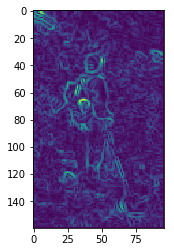

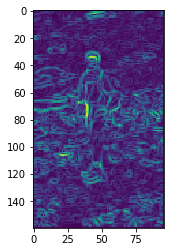

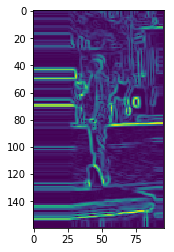

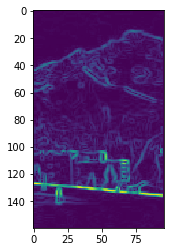

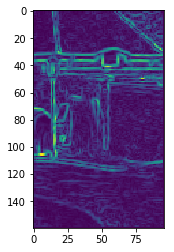

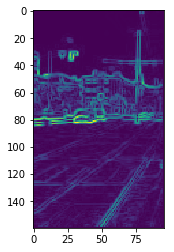

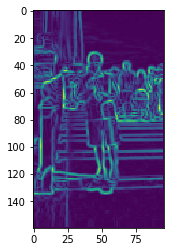

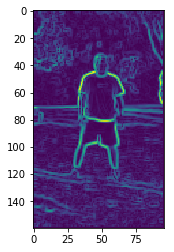

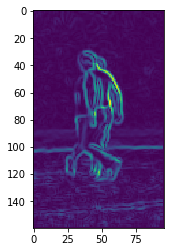

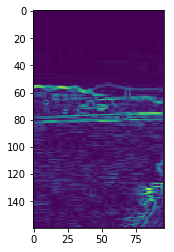

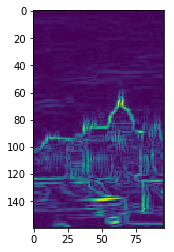

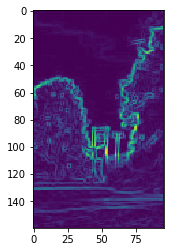

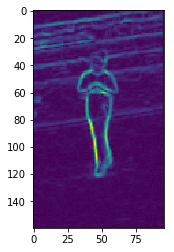

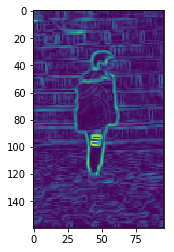

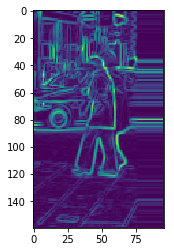

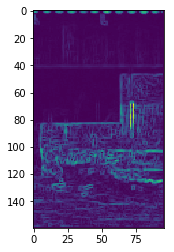

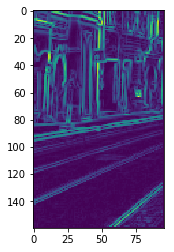

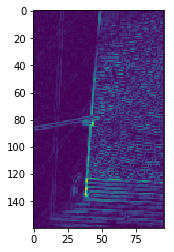

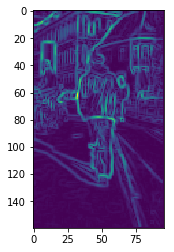

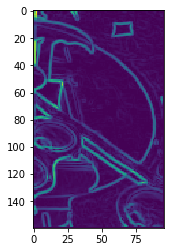

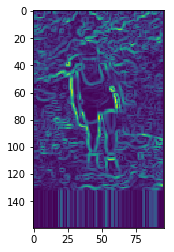

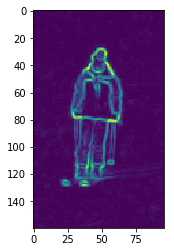

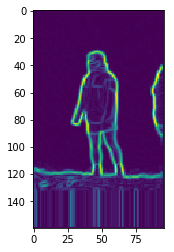

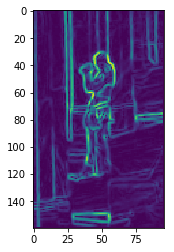

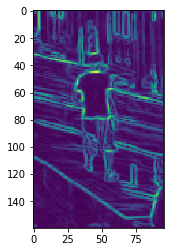

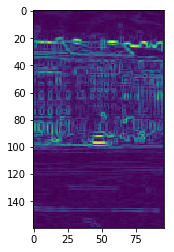

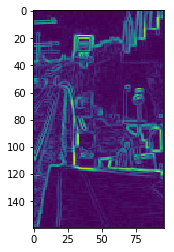

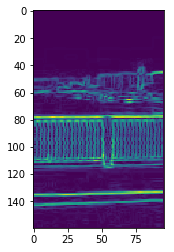

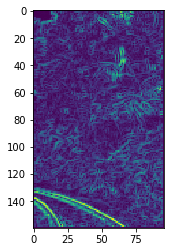

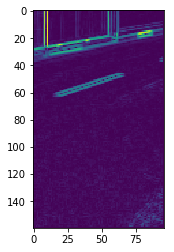

for Hidden node = 250 and eta = 0.003000
Epoch 0: err 0.149526
Epoch 1: err 0.142667
Epoch 2: err 0.136249
Epoch 3: err 0.130424
Epoch 4: err 0.125283
Epoch 5: err 0.120718
Epoch 6: err 0.116634
Epoch 7: err 0.112920
Epoch 8: err 0.109631
Epoch 9: err 0.106602
Epoch 10: err 0.103862
Epoch 11: err 0.101297
Epoch 12: err 0.098896
Epoch 13: err 0.096625
Epoch 14: err 0.094485
Epoch 15: err 0.092423
Epoch 16: err 0.090443
Epoch 17: err 0.088514
Epoch 18: err 0.086650
Epoch 19: err 0.084812
Epoch 20: err 0.083018
Epoch 21: err 0.081265
Epoch 22: err 0.079534
Epoch 23: err 0.077847
Epoch 24: err 0.076190
Epoch 25: err 0.074554
Epoch 26: err 0.072941
Epoch 27: err 0.071367
Epoch 28: err 0.069824
Epoch 29: err 0.068288
Epoch 30: err 0.066784
Epoch 31: err 0.065277
Epoch 32: err 0.063820
Epoch 33: err 0.062406
Epoch 34: err 0.061012
Epoch 35: err 0.059637
Epoch 36: err 0.058333
Epoch 37: err 0.057042
Epoch 38: err 0.055747
Epoch 39: err 0.054516
Epoch 40: err 0.053291
Epoch 41: err 0.052099
Epo

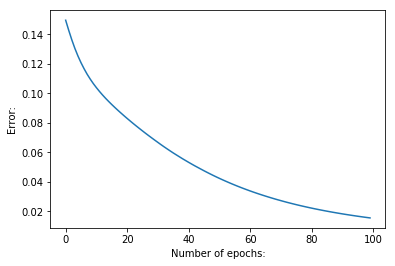

correct = 9
wrong = 1
Accuracy is 90.000000 Percent.
for Hidden node = 500 and eta = 0.003000
Epoch 0: err 0.186032
Epoch 1: err 0.179497
Epoch 2: err 0.172263
Epoch 3: err 0.164339
Epoch 4: err 0.155755
Epoch 5: err 0.146772
Epoch 6: err 0.137792
Epoch 7: err 0.129209
Epoch 8: err 0.121510
Epoch 9: err 0.114903
Epoch 10: err 0.109449
Epoch 11: err 0.104846
Epoch 12: err 0.100859
Epoch 13: err 0.097298
Epoch 14: err 0.094068
Epoch 15: err 0.091086
Epoch 16: err 0.088237
Epoch 17: err 0.085520
Epoch 18: err 0.082903
Epoch 19: err 0.080378
Epoch 20: err 0.077938
Epoch 21: err 0.075596
Epoch 22: err 0.073337
Epoch 23: err 0.071112
Epoch 24: err 0.068979
Epoch 25: err 0.066919
Epoch 26: err 0.064936
Epoch 27: err 0.063028
Epoch 28: err 0.061190
Epoch 29: err 0.059408
Epoch 30: err 0.057722
Epoch 31: err 0.056068
Epoch 32: err 0.054477
Epoch 33: err 0.052925
Epoch 34: err 0.051411
Epoch 35: err 0.049954
Epoch 36: err 0.048548
Epoch 37: err 0.047201
Epoch 38: err 0.045881
Epoch 39: err 0.044

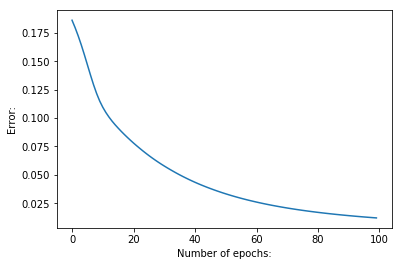

correct = 10
wrong = 0
Accuracy is 100.000000 Percent.
for Hidden node = 1000 and eta = 0.010000
Epoch 0: err 0.147966
Epoch 1: err 0.124780
Epoch 2: err 0.108711
Epoch 3: err 0.096890
Epoch 4: err 0.087224
Epoch 5: err 0.078837
Epoch 6: err 0.071474
Epoch 7: err 0.064837
Epoch 8: err 0.058932
Epoch 9: err 0.053603
Epoch 10: err 0.048845
Epoch 11: err 0.044589
Epoch 12: err 0.040826
Epoch 13: err 0.037430
Epoch 14: err 0.034388
Epoch 15: err 0.031661
Epoch 16: err 0.029203
Epoch 17: err 0.027013
Epoch 18: err 0.025021
Epoch 19: err 0.023232
Epoch 20: err 0.021615
Epoch 21: err 0.020146
Epoch 22: err 0.018816
Epoch 23: err 0.017601
Epoch 24: err 0.016500
Epoch 25: err 0.015491
Epoch 26: err 0.014570
Epoch 27: err 0.013742
Epoch 28: err 0.012968
Epoch 29: err 0.012259
Epoch 30: err 0.011619
Epoch 31: err 0.011021
Epoch 32: err 0.010472
Epoch 33: err 0.009966


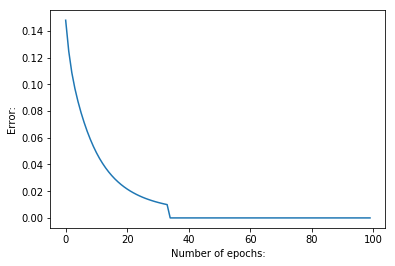

correct = 9
wrong = 1
Accuracy is 90.000000 Percent.


In [13]:
if __name__=="__main__":
    main()